In [68]:
import random
import networkx as nx
from matplotlib import pyplot as plt
def random_walk(graph, start_node, num_steps=10):
    walk = [start_node]
    
    i=0
    for _ in range(num_steps):
        neighbors = list(nx.neighbors(graph, walk[-1]))
        print(neighbors)
        if neighbors:
            next_node = random.choice(neighbors)
            walk.append(next_node)
        else:
            break # if the node has no neighbors, we can't go any further
    
    return walk

from collections import Counter

def walk_to_frequency(graph, walk):
    counter = Counter(walk)
    frequency = [0]*len(graph.nodes)
    for node, count in counter.items():
        frequency[node] = count
    return frequency

def frequency_to_probability(frequency):
    total_steps = sum(frequency)
    probability = [f / total_steps for f in frequency]
    return probability

In [70]:
# G = nx.gnp_random_graph(200, 0.5)
G = nx.path_graph(10)
# start_node = random.choice(list(G.nodes))
start_node = 0
walk = random_walk(G, start_node, num_steps=10)
frequency = walk_to_frequency(G, walk)
probability = frequency_to_probability(frequency)
# print(probability)


[1]
[0, 2]
[1]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4, 6]
[3, 5]
[4, 6]


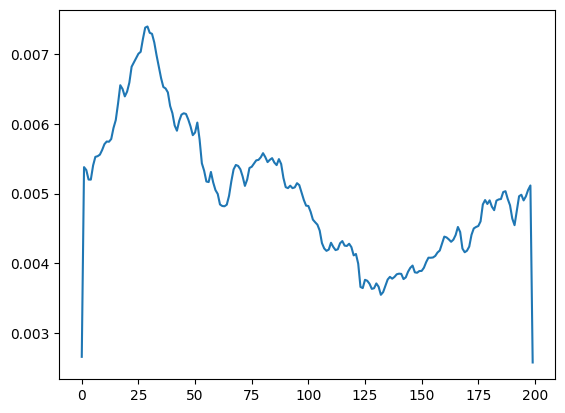

In [64]:
plt.plot(probability)